------------------------------------------------------------------------------------------------------------------

## Graduate Rotation Internship Program  - THE SPARKS FOUNDATION

------------------------------------------------

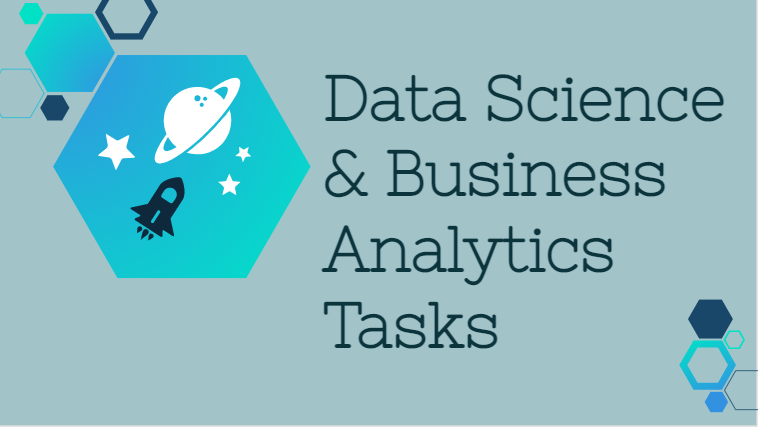

## Name  - Kanchan Bora

# Data Science And Business Analytics Intern

-------

### TASK 1 - Prediction using Supervised ML

#### PROBLEM STATEMENT - Predict the percentage of marks of the students based on the number of study hours.

In [48]:
# importing the important libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading the Data

In [49]:
# Reading the Data 
data = pd.read_csv('Task1.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring the dataset

In [50]:
# Check if there any null value in the Dataset
data.isnull == True

False

There is no null value in the Dataset so, we can now visualize our Data.

In [51]:
#number of rows and columns
data.shape

(25, 2)

In [52]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization

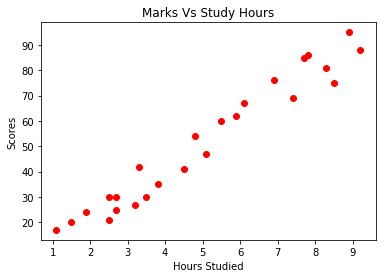

In [53]:
#Hours Vs Percentage of Scores
plt.scatter(data['Hours'], data['Scores'],color = 'red')
plt.title('Marks Vs Study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

From the above scatter plot there looks to be correlation between the 'Scores' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

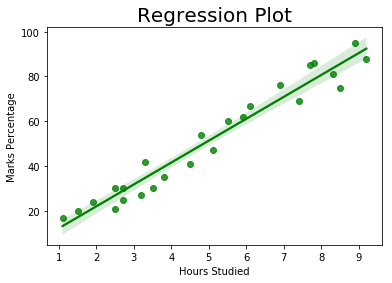

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [54]:
sns.regplot(x= data['Hours'], y= data['Scores'],color = 'green')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.

## Training the Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [56]:
# Defining X and y from the Data

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### 1. Splitting the Data

In [57]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

### 2. Fitting the Data into the model

In [58]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

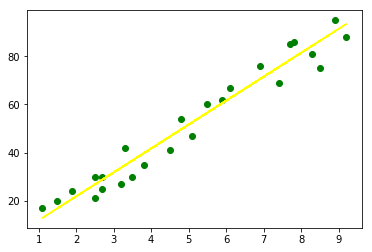

In [59]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'green')
plt.plot(X, line,color = 'yellow');
plt.show()


Predicting the Percentage of Marks for test set

In [60]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


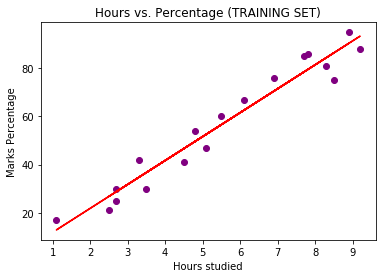

In [61]:
#Visualising the Training set results

plt.scatter(train_X,train_y, color = 'purple')
plt.plot(train_X, regression.predict(train_X), color = 'red')
plt.title('Hours vs. Percentage (TRAINING SET)')
plt.xlabel('Hours studied')
plt.ylabel('Marks Percentage')
plt.show()

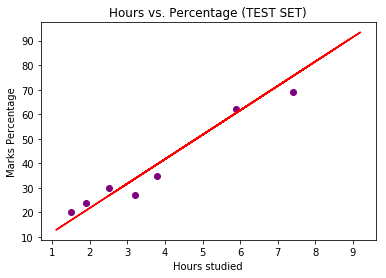

In [62]:
#Visualising the Test set results
plt.scatter(test_X, test_y, color = 'purple')
plt.plot(train_X, regression.predict(train_X), color = 'red')
plt.title('Hours vs. Percentage (TEST SET)')
plt.xlabel('Hours studied')
plt.ylabel('Marks Percentage')
plt.show()

Comparing the Predicted Marks with the Actual Marks

In [63]:
compare = pd.DataFrame({'Actual Marks':test_y, 'Predicted Marks': pred_y})
compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing the Predicted Marks with the Actual Marks

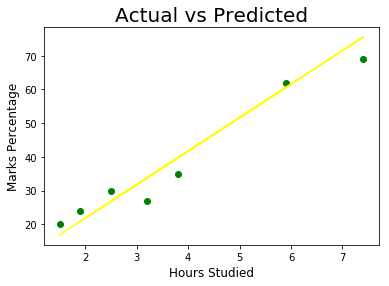

In [64]:
plt.scatter(x=test_X, y=test_y, color='green')
plt.plot(test_X, pred_y, color='yellow')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

In [65]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502486


Small value of Mean absolute error states that the chances of error through the model are very less.

In [66]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(test_y,pred_y))

The R-Square of the model is:  0.9367661043365055


### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [67]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### Conclusion:

According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.